# TP 1 : Équation de Transport

Le but de ce TP est la résolution numérique par différents
schémas aux différences sur grille uniforme de l'équation de
transport :
\begin{equation}
\begin{cases}
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
\quad x \in [-\pi,\pi], t\in I\!\!R,\\
u(x,0)=u_0(x)\\
u(.,t) \quad 2\pi\text{-périodique}
\end{cases} \quad \quad(1)
\end{equation}


Pour la suite on fixe $a=1$ et l'intervalle de temps de notre étude
$[0,T]$ avec $T=8$. On note $k$ le pas de temps, $n$ l'indice
au temps $t_n$, $h$ le pas en espace et $m$ l'indice au point $x_m$.

Pour les différents tests on prendra les 2 conditions initiales :
\begin{equation*}
u_0^1(x)=
\begin{cases}
e^{\frac{1}{x^2-1}} &\text{si } |x| < 1\\
0 &\text{sinon}
\end{cases}
\quad\text{et}\quad
u_0^2(x)=
\begin{cases}
1-|x| &\text{si } |x| < 1\\
0 &\text{sinon}
\end{cases}
\end{equation*}

### Donner les solution exactes du problème (1).
Les solutions classiques de l'équation de transport sont les fonctions constantes le long des droites caractéristiques :
\begin{align}
    x = at + x_0
\end{align}
On a la solution analytique du problème : 
\begin{align}
    u(x,t) &= u_0(x-at)\\
    x &\in [-\pi,\pi]\\
    t &\in \mathbb{R}
\end{align}
### Implémenter les schémas suivants. 

Il s'agit
de schémas à un pas, il est possible d'utiliser une représentation
matricielle commune de la forme $AU_{n+1}=BU_n$, avec $A$ et $B$ matrices et
$U_n$ solution discrête au temps $t_n$.

Obtenir une animation avec la supperposition de la solution exacte et
solution calculée pour chaque cas.

Donner l'ordre des schémas, ainsi que les conditions de stabilité. Calculer et représenter le symboles de chaque schéma (voir cours), illustrer vos calcul par des choix judicieux de simulations et de
courbes.

In [1]:
%%file u01.m
function out=u01(x)
    % 2-pi périodique
    while (x>pi)
        x=x-2*pi;
    end
    while (x<-pi)
        x=x+2*pi;
    end
    
    if abs(x)<1
         out=exp(1/(x^2-1));
    else
         out=0;
    end
end

Created file '/home/olivier.guilmin/u01.m'.


In [2]:
%%file u02.m
function out=u02(x)
    % 2\pi périodic
    while x>pi
        x=x-2*pi;
    end
    while x<-pi
        x=x+2*pi;
    end
    
    if abs(x)<1
         out=1-abs(x);
    else
         out=0;
    end
end

Created file '/home/olivier.guilmin/u02.m'.


In [3]:
%plot  -s 800,600

In [4]:
% Paramètres de simulation
% espace
N=100;
h=2*pi/N;
x=linspace(-pi,pi,N+1)';
% temps
M=10;
k=1.1*h;
disp(k/h)

1.1000

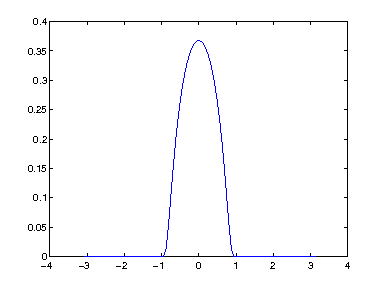

In [5]:
% initialisation
U0=zeros(N,1);
for i=1:N
    U0(i)= u01(x(i+1));
end
plot(x(2:end),U0);

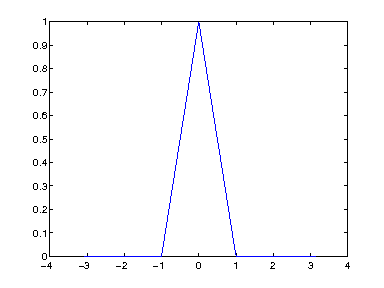

In [6]:
% initialisation
U0=zeros(N,1);
for i=1:N
    U0(i)= u02(x(i+1));
end
plot(x(2:end),U0);

## Schéma de Courant

\begin{equation}
    \begin{cases}
        \frac{u_m^{n+1}-u_m^{n}}{k}+\frac{a}{h}(u_m^{n}-u_{m-1}^{n})=0\\
        u^0_m=u_0(x_m)\\
    \end{cases}
\end{equation}

Le schéma de courant utilise une dérivée arrière en espace : $u_m^{n}-u_{m-1}^{n}$. 

Ce choix est plus judicieux qu'une dérivée centrée en espace :  $u_{m+1}^{n}-u_{m-1}^{n}$

On se propose d'étudier le symbole du schéma. Pour cela, on pose :
\begin{align}
    \lambda &= \frac{ak}{h}\\
    \omega_l &= \frac{2\pi}{l}\\\\
    u^n_m(x) &= \xi_n~e^{i\omega_lmh}\\
    u^{n+1}_m(x) &= \xi_{n+1}~e^{i\omega_lmh}\\\\
    \xi_{n+1}~e^{i\omega_l mh} &= \xi_{n}~e^{i\omega_l mh} - \lambda(\xi_{n}~e^{i\omega_l mh} - \xi_{n}~e^{i\omega_l (m-1)h})\\
    \xi_{n+1}~e^{i\omega_l mh} &= (1-\lambda)\xi_{n}~e^{i\omega_l mh} + \lambda\xi_{n}~e^{i\omega_l (m-1)h}\\
    \xi_{n+1} &= (1-\lambda + \lambda e^{-i\omega_l h})\xi_{n}\\\\
\text{on pose :}\\
    (1-\lambda + \lambda e^{-i\omega_l h} ) &= g(\lambda, \omega_l)\\\\
\text{On a donc : }
    g(\lambda, \omega_l) &= \frac{\xi_{n+1}}{\xi_{n}}
\end{align}


\begin{align} 
    g(\lambda, \omega_l) &= 1-\lambda + \lambda cos(\omega _l h) -i \lambda sin(\omega _l h) \\\\\\
    \text{La condition de stabilité est : }\\
    \vert g(\lambda, \omega_l) \vert &= \vert1-\lambda + \lambda cos(\omega _l h) -i \lambda sin(\omega _l h) \vert \leq 1\\\\
    \text{Une condition équivalente de stabilité est donc : }\\
    |g(\lambda, \omega_l)|^2 &= (1-\lambda + \lambda cos(\omega _l h))^2 + \lambda^2 sin^2(\omega _l h) \\
    &= (1-\lambda(1-cos(\omega _l h)))^2 + \lambda^2 sin^2(\omega _l h) \\
    &= 1-2\lambda + \lambda^2 + 2\lambda cos(\omega _l h) -2\lambda^2 cos(\omega _lh) + \lambda^2 cos^2(\omega _lh) + \lambda^2 sin^2(\omega _lh)\\
    &= 1-2\lambda + \lambda^2 + 2\lambda cos(\omega _l h) - 2\lambda^2 cos(\omega _lh) + \lambda^2\\
    &= (\lambda -1)^2 + 2 (\lambda - \lambda^2)cos(\omega _l h)\\\\
    \text{On obtient également la phase :}\\
    arg(g(λ,w))&=arctan(\lambda sin(\omega_lh),1−\lambda(1−cos(\omega_lh))
\end{align}


In [7]:
%%file module_g.m
function out = module_g(lambda,w,h)
    out = zeros(length(w),1);
    
    for i = 1 : length(w)
        out(i) = sqrt(1-2*lambda+2*lambda^2 + 2*lambda*cos(w(i)*h) - 2*(lambda^2)*cos(w(i)*h));
    end
end

Created file '/home/olivier.guilmin/module_g.m'.


In [8]:
%%file arg_g.m
function out = arg_g(lambda,w)
    out = zeros(length(w),1);
    
    for i = 1 : length(w)
        out(i) = atan2(lambda*sin(w(i)), 1-lambda*(1-cos(w(i))));
    end
end

Created file '/home/olivier.guilmin/arg_g.m'.


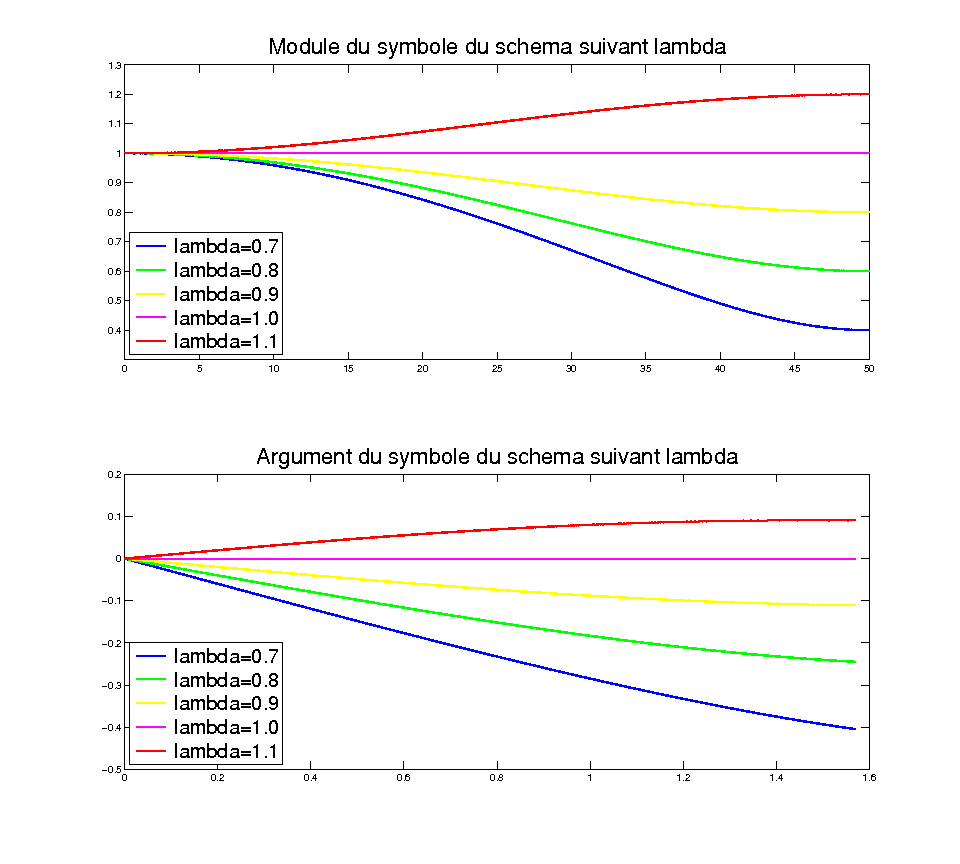

In [9]:
%plot  -s 2000,1800
h=2*pi/N;
W=linspace(0,pi/h,1000);
color = char('b','g','y','m','r');
subplot(2,1,1)
c1 = 1;
for lambda=0.7:0.1:1.1
  plot(W, module_g(lambda,W,h), color(c1), 'LineWidth',2)
  hold on
  c1 = c1+1;
end

title('Module du symbole du schema suivant lambda','FontSize',22)
legend({' lambda=0.7',' lambda=0.8',' lambda=0.9',' lambda=1.0',' lambda=1.1'},'FontSize',20,'Location','southwest')



subplot(2,1,2)
c2=1;
W2=linspace(0,pi/2,1000);
for lambda=0.7:0.1:1.1
  plot(W2, arg_g(lambda,W2)-W2',color(c2), 'LineWidth',2)     % Pourquoi arg_g(lambda,W2)-W2' au lieu de arg_g(lambda,W2) ?
  hold on
  c2 = c2+1;
end
title('Argument du symbole du schema suivant lambda','FontSize',22)
legend({' lambda=0.7',' lambda=0.8',' lambda=0.9',' lambda=1.0',' lambda=1.1'},'FontSize',20,'Location','southwest')

In [10]:
A = sparse([],[],[],N,N,0);
for i=1:N
    A(i,i)=1-k/h;
end
for i=2:N
    A(i,i-1)=k/h;
end
A(1,N)=k/h;

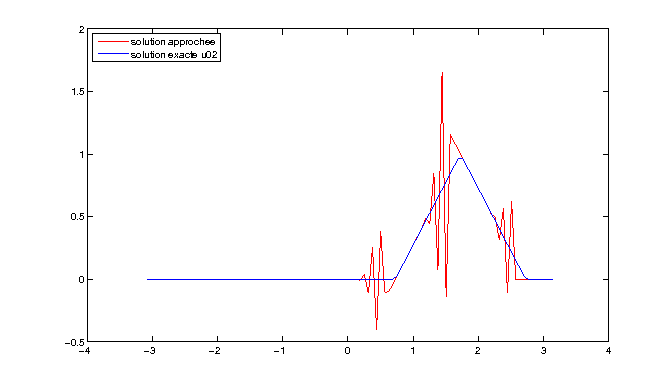

In [13]:
%plot  -s 1400,800

M=U0; 
Mex=U0;
U=U0;
for n=1:1:25
    U=A*U;
    M=[M,U];
    tmp=zeros(N,1);
    for i=1:N
        tmp(i)=u02(x(i+1)-n*k);

    end
    Mex=[Mex,tmp];
end
plot(x(2:end),M(:,size(M,2)),'r-',x(2:end), Mex(:,size(M,2)),'b-')
legend('solution approchee','solution exacte u02','Location','northwest')

% Animation :
%for p=1:size(M,2)
%    plot(x(2:end),M(:,p),'r-',x(2:end),Mex(:,p),'b-','LineWidth',1.5)
%    pause(0.5)
%end

# Schéma de Lax
\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}-\frac{1}{2}(u_{m+1}^{n}+u_{m-1}^{n}))
+\frac{a}{2h}(u_{m+1}^{n}-u_{m-1}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}
avec $n$ l'index de temps et $m$ l'index d’espace.


\begin{align}
    \lambda &= \frac{ak}{h}\\
    \omega_l &= \frac{2\pi}{l}\\\\
    u^n_m(x) &= \xi_n~e^{i\omega_lmh}\\
    u^{n+1}_m(x) &= \xi_{n+1}~e^{i\omega_lmh}\\\\
    \xi_{n+1}~e^{i\omega_l mh} &= \frac{1}{2}(\xi_{n}~e^{i\omega_l (m+1)h} + \xi_{n}~e^{i\omega_l (m-1)h}) - \frac{\lambda}{2} (\xi_{n}~e^{i\omega_l (m+1)h} - \xi_{n}~e^{i\omega_l (m-1)h})\\
    \xi_{n+1}&= \frac{1}{2}(\xi_{n}~e^{i\omega_l h} + \xi_{n}~e^{-i\omega_l h}) - \frac{\lambda}{2} (\xi_{n}~e^{i\omega_l h} - \xi_{n}~e^{-i\omega_l h})\\
    \xi_{n+1}&= \xi_{n}(\frac{1}{2}(e^{i\omega_l h} + e^{-i\omega_l h}) - \frac{\lambda}{2} (e^{i\omega_l h} - e^{-i\omega_l h}))\\
    \xi_{n+1}&= \xi_{n}(cos(\omega_l h)-i \lambda sin(\omega_l h) )\\\\
    \text{on pose :}\\
    (cos(\omega_l h)-i \lambda sin(\omega_l h) ) &= g(\lambda, \omega_l)\\\\
\text{On a donc : }
    g(\lambda, \omega_l) &= \frac{\xi_{n+1}}{\xi_{n}}\\
    \text{Une condition de stabilité est donc : }\\
    |g(\lambda, \omega_l)|^2 &= cos^2(\omega_l h) + \lambda^2 sin^2(\omega_l h)\\
    \text{On obtient également la phase :}\\
    arg(g(λ,w))&=arctan(-\lambda sin(\omega_lh),cos(\omega_lh))
\end{align}


In [14]:
%%file module_g2.m
function out = module_g2(lambda, w, h)
out = zeros(length(w),1);
for i = 1:length(w)
    %out(i) = sqrt(1 + (lambda^2-1)*sin(w(i)*h));
    out(i) = sqrt(cos(w(i)*h)*cos(w(i)*h) + (lambda^2)*sin(w(i)*h)*sin(w(i)*h));
end

Created file '/home/olivier.guilmin/module_g2.m'.


In [15]:
%%file arg_g2.m
function out = arg_g2(lambda, w, h)
out = zeros(length(w),1);
for i = 1:length(w)
    out(i) = atan2(-lambda*sin(w(i)*h), cos(w(i)*h));
end

Created file '/home/olivier.guilmin/arg_g2.m'.


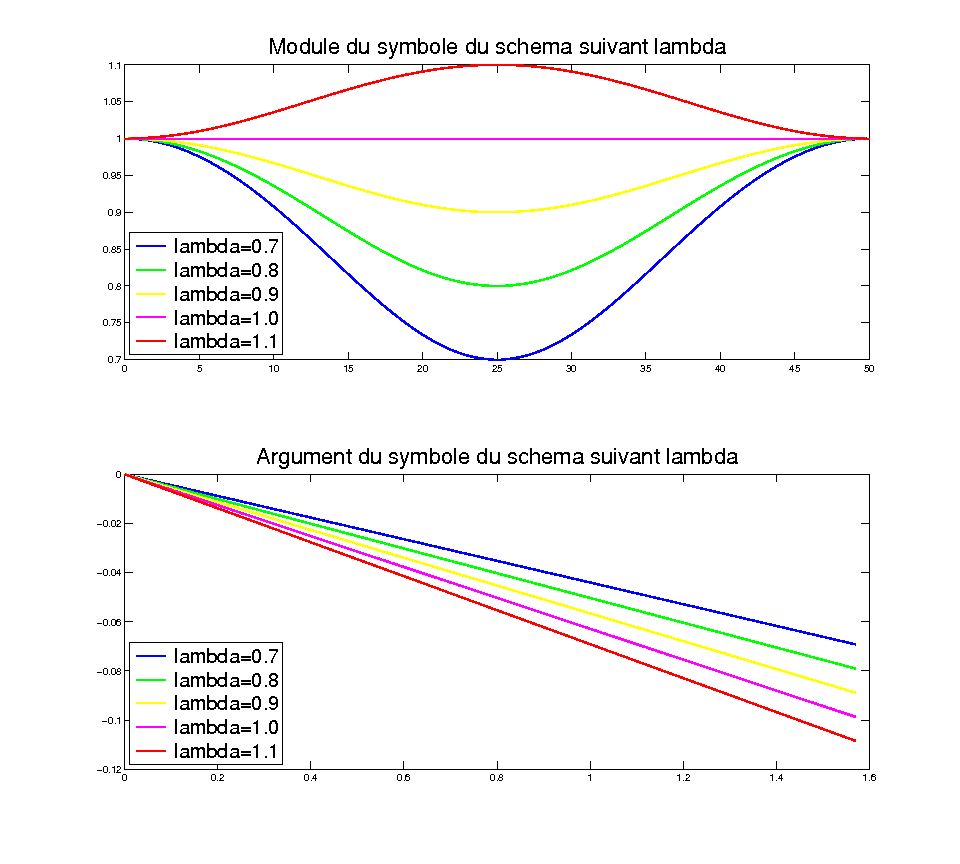

In [16]:
%plot  -s 2000,1800

h=2*pi/100;
W=linspace(0,pi/h,1000);

color = char('b','g','y','m','r');

subplot(2,1,1)
c1=1;
for lambda=0.7:0.1:1.1
  plot(W, module_g2(lambda,W,h), color(c1), 'LineWidth',2)
  hold on
  c1=c1+1;
end
title('Module du symbole du schema suivant lambda','FontSize',22)
legend({' lambda=0.7',' lambda=0.8',' lambda=0.9',' lambda=1.0',' lambda=1.1'},'FontSize',20,'Location','southwest')

subplot(2,1,2)
c2=1;
W2=linspace(0,pi/2,1000);
for lambda=0.7:0.1:1.1
  plot(W2, arg_g2(lambda,W2,h),color(c2), 'LineWidth',2) 
  hold on
  c2=c2+1;
end
title('Argument du symbole du schema suivant lambda','FontSize',22)
legend({' lambda=0.7',' lambda=0.8',' lambda=0.9',' lambda=1.0',' lambda=1.1'},'FontSize',20,'Location','southwest')

In [17]:
A = sparse([],[],[],N,N,0);
for i=2:N
    A(i,i-1)=1/2+k/h/2;
end
for i=1:N-1
    A(i,i+1)=1/2-k/h/2;
end
A(1,N)=1/2+k/h/2;
A(N,1)=1/2-k/h/2;

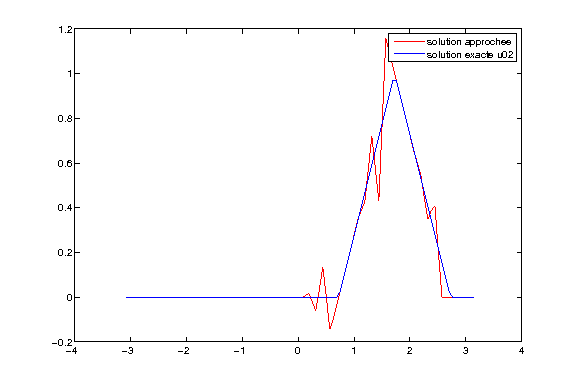

In [19]:
%plot  -s 1200,800

M=U0;
Mex=U0;
U=U0;
for n=1:25
    U=A*U;
    M=[M,U];
    tmp=zeros(N,1);
    for i=1:N
        tmp(i)=u02(x(i+1)-n*k);
    end
    Mex=[Mex,tmp];
end

plot(x(2:end),M(:,size(M,2)),'r-',x(2:end), Mex(:,size(M,2)),'b-')
legend('solution approchee','solution exacte u02','Location','northeast')



# Schéma de Lax Wendroff

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}-u_m^{n}) + 
\frac{a}{2h}(u_{m+1}^{n}-u_{m-1}^{n})
-\frac{a^2 k}{2h^2}(u_{m+1}^{n}-2u_m^{n}+u_{m-1}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}



On obtient :
\begin{align}
    u_{m}^{n+1} &= u_{m}^{n} - \frac{ak}{2h} (u_{m+1}^{n}-u_{m-1}^{n}) + \frac{a^2k^2}{2h^2} (u_{m+1}^{n} - 2u_{m}^{n} + u_{m-1}^{n})\\
    u_{m}^{n+1} &= u_{m}^{n} - \frac{\lambda}{2} (u_{m+1}^{n}-u_{m-1}^{n}) + \frac{\lambda^2}{2} (u_{m+1}^{n} - 2u_{m}^{n} + u_{m-1}^{n})\\
\end{align}


En appliquant la transformation de Fourier au schéma de Lax-Wendroff, on obtient:
\begin{align}
    \lambda &= \frac{ak}{h}\\
    \omega_l &= \frac{2\pi}{l}\\\\
    u^n_m(x) &= \xi_n~e^{i\omega_lmh}\\
    u^{n+1}_m(x) &= \xi_{n+1}~e^{i\omega_lmh}\\\\
    \xi_{n+1}~e^{i\omega_l mh} &= \xi_{n}~e^{i\omega_l mh} -\frac{\lambda}{2}(\xi_{n}~e^{i\omega_l (m+1)h} - \xi_{n}~e^{i\omega_l (m-1)h}) - \frac{\lambda^2}{2} (\xi_{n}~e^{i\omega_l (m+1)h} - 2\xi_{n}~e^{i\omega_l mh}+\xi_{n}~e^{i\omega_l (m-1)h})\\
    \xi_{n+1} &= \xi_{n} - \frac{\lambda}{2} (\xi_{n}~e^{i\omega_l h} - \xi_{n}~e^{-i\omega_l h} ) - \frac{\lambda^2}{2} (\xi_{n}~e^{i\omega_l h} -2 \xi_{n} + \xi_{n}~e^{-i\omega_l h} )\\
    \xi_{n+1} &=\xi_{n}(1 - i \lambda sin(\omega_l h) - \lambda^2 cos(\omega_l h) +\lambda^2)\\
    \text{on pose :}\\
    (1 - i \lambda sin(\omega_l h) - \lambda^2 cos(\omega_l h) +\lambda^2) &= g(\lambda, \omega_l)\\\\
\text{On a donc : }
    g(\lambda, \omega_l) &= \frac{\xi_{n+1}}{\xi_{n}}\\
    \text{Une condition de stabilité est donc : }\\
    |g(\lambda, \omega_l)|^2 &= (1 + \lambda^2 - \lambda ^2  cos(\omega_l h))^2 + (-\lambda sin(\omega_l h))^2 \\
    \text{On obtient également la phase :}\\
    arg(g(λ,w))&=arctan(-\lambda sin(\omega_l h) , 1 - \lambda^2 + \lambda ^2  cos(\omega_l h))
\end{align}





In [20]:
%%file module_g3.m
function out = module_g3(lambda, w, h)
out = zeros(length(w),1);
for i = 1:length(w)
    out(i) = sqrt((1+lambda^2 - (lambda^2)*cos(w(i)*h))^2 + (-lambda*sin(w(i)*h))^2);
end

Created file '/home/olivier.guilmin/module_g3.m'.


In [21]:
%%file arg_g3.m
function out = arg_g3(lambda, w, h)
out = zeros(length(w),1);
for i = 1:length(w)
    out(i) = atan2(-lambda*sin(w(i)*h), 1-(lambda^2) + (lambda^2)*cos(w(i)*h));
end

Created file '/home/olivier.guilmin/arg_g3.m'.


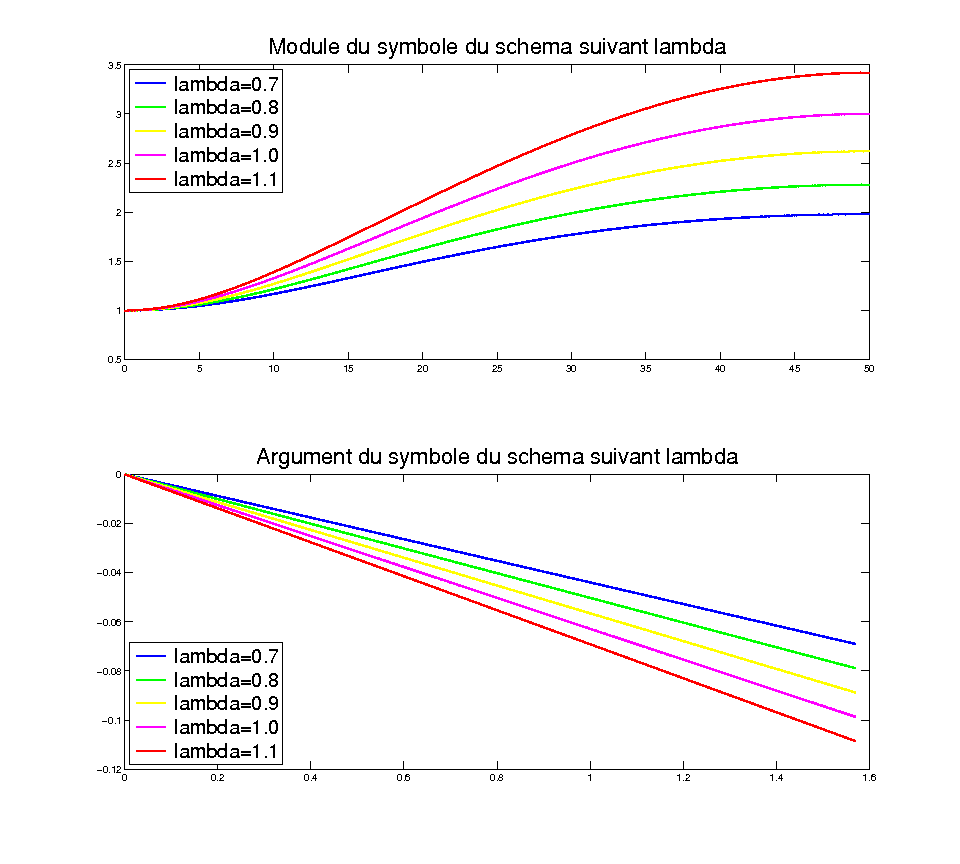

In [23]:
%plot  -s 2000,1800
h=2*pi/100;
W=linspace(0,pi/h,1000);

color = char('b','g','y','m','r');

subplot(2,1,1)
c1=1;
for lambda=0.7:0.1:1.1
  plot(W, module_g3(lambda,W,h), color(c1), 'LineWidth',2)
  hold on
  c1=c1+1;
end
title('Module du symbole du schema suivant lambda','FontSize',22)
legend({' lambda=0.7',' lambda=0.8',' lambda=0.9',' lambda=1.0',' lambda=1.1'},'FontSize',20,'Location','northwest')

subplot(2,1,2)
c2=1;
W2=linspace(0,pi/2,1000);
for lambda=0.7:0.1:1.1
  plot(W2, arg_g3(lambda,W2,h),color(c2), 'LineWidth',2) 
  hold on
  c2=c2+1;
end
title('Argument du symbole du schema suivant lambda','FontSize',22)
legend({' lambda=0.7',' lambda=0.8',' lambda=0.9',' lambda=1.0',' lambda=1.1'},'FontSize',20,'Location','southwest')

Le schéma de Lax-Wendroff souffre d'une mauvaise approximation de la phase (RETARD le plus souvent). C'est à dire que si l'on propage une discontinuité on verra apparaître des oscillations à l'arrière de la discontinuité.

Le schéma de Lax-Wendroff est un schéma d'ordre 2 en temps et en espace.

In [24]:
A = sparse([],[],[],N,N,0);
for i=1:N
    A(i,i)=1-(k/h)^2;
end
for i=2:N
    A(i,i-1)=k/h/2+((k/h)^2)/2;
end
for i=1:N-1
    A(i,i+1)=-k/h/2+((k/h)^2)/2;
end
A(1,N)=k/h/2+((k/h)^2)/2;
A(N,1)=-k/h/2+((k/h)^2)/2;

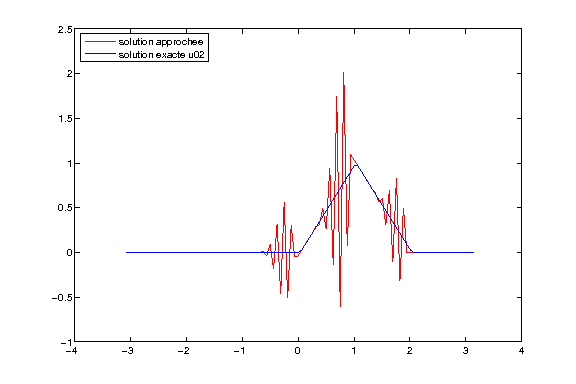

In [27]:
%plot  -s 1200,800
M=U0;
Mex=U0;
U=U0;
for n=1:15
    U=A*U;
    M=[M,U];
    tmp=zeros(N,1);
    for i=1:N
        tmp(i) = u02(x(i+1)-n*k);
    end
    Mex  = [Mex,tmp];
end
plot(x(2:end),M(:,size(M,2)),'r-',x(2:end), Mex(:,size(M,2)),'b-')
legend('solution approchee','solution exacte u02','Location','northwest')

## Schéma de Thomé (Box-Sheme)

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}+u_{m+1}^{n+1}-u_m^{n}-u_{m+1}^{n})+
\frac{a}{h}(u_{m+1}^{n+1}+u_{m+1}^{n}-u_{m}^{n+1}-u_{m}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}


On obtient :
\begin{align}
    u_{m}^{n+1} + u_{m+1}^{n+1} + \lambda(u_{m+1}^{n+1} - u_{m}^{n+1})&= u_{m}^{n} + u_{m+1}^{n} +\lambda (u_{m}^{n} -u_{m+1}^{n})\\
    u_{m}^{n+1}(1-\lambda) + u_{m+1}^{n+1}(1+\lambda) &= u_{m}^{n}(1+\lambda) + u_{m+1}^{n}(1-\lambda)\\\\\\
\end{align}


En appliquant la transformation de Fourier au schéma de Lax-Wendroff, on obtient:

\begin{align}
    \lambda &= \frac{ak}{h}\\
    \omega_l &= \frac{2\pi}{l}\\\\
    u^n_m(x) &= \xi_n~e^{i\omega_lmh}\\
    u^{n+1}_m(x) &= \xi_{n+1}~e^{i\omega_lmh}\\\\
    \xi_{n+1}~e^{i\omega_l mh}(1-\lambda) + \xi_{n+1}~e^{i\omega_l mh + i\omega_l h}(1+\lambda) &= \xi_{n}~e^{i\omega_l mh}(1+\lambda) + \xi_{n}~e^{i\omega_l mh + i\omega_l h}(1-\lambda)\\
    \xi_{n+1}(1-\lambda) + \xi_{n+1} e^{i \omega_l h}  (1+\lambda) &= \xi_{n}(1+\lambda) + \xi_{n}e^{i \omega_l h}(1-\lambda)\\
     \xi_{n+1}(1 - \lambda + e^{i \omega_l h}(1+\lambda)) &=  \xi_{n}(1+\lambda + e^{i \omega_l h} (1-\lambda)\\
     \frac{\xi_{n+1}}{\xi_{n}} &= \frac{1+\lambda + e^{i \omega_l h} (1-\lambda)} {1 - \lambda + e^{i \omega_l h}(1+\lambda) } = g(\lambda,\omega_l)
\end{align}

\begin{align}
    g(\lambda,\omega_l) &= \frac{g_1}{g_2}\\
    |g(\lambda,\omega_l)| &= \frac{|g_1|}{|g_2|}\\
    |g_1|^2 &=(1+\lambda + cos(\omega_l h) - \lambda cos(\omega_l h))^2 + (sin(\omega_l h)- \lambda sin(\omega_l h))^2\\
            &= 2 + 2\lambda^2 + 2cos(\omega_l h) - 2\lambda^2 cos(\omega_l h)\\\\
    |g_2|^2 &=(1-\lambda + cos(\omega_l h) + \lambda cos(\omega_l h))^2 + (sin(\omega_l h)+ \lambda sin(\omega_l h))^2\\
            &= 2 + 2\lambda ^2 + 2cos(\omega_l h) - 2\lambda ^2 cos(\omega_l h)\\
    |g_1| &= |g_2|\\        
    \text{alors,}\\
    |g(\lambda,\omega_l)|^2 &= 1 \rightarrow \text{Le schéma est inconditionnellement stable.}\\
\end{align}


Ce n'est plus un problème d'interpolation. Il n'y a plus d'erreurs. La solution finale vient de la solution initiale qui va être transportée à chaque itération.


\begin{align}
    arg(g) = arg(g_1) - arg(g_2) = 2arg(g_1) = 2 arctan(-\lambda tan(\frac{\omega_l h}{2})
\end{align}


In [28]:
%%file arg_g4.m
function out = arg_g4(lambda, w, h)
out = zeros(length(w),1);
for i = 1:length(w)
    out(i) = 2*atan(-lambda*tan(w(i)*h/2));
end

Created file '/home/olivier.guilmin/arg_g4.m'.


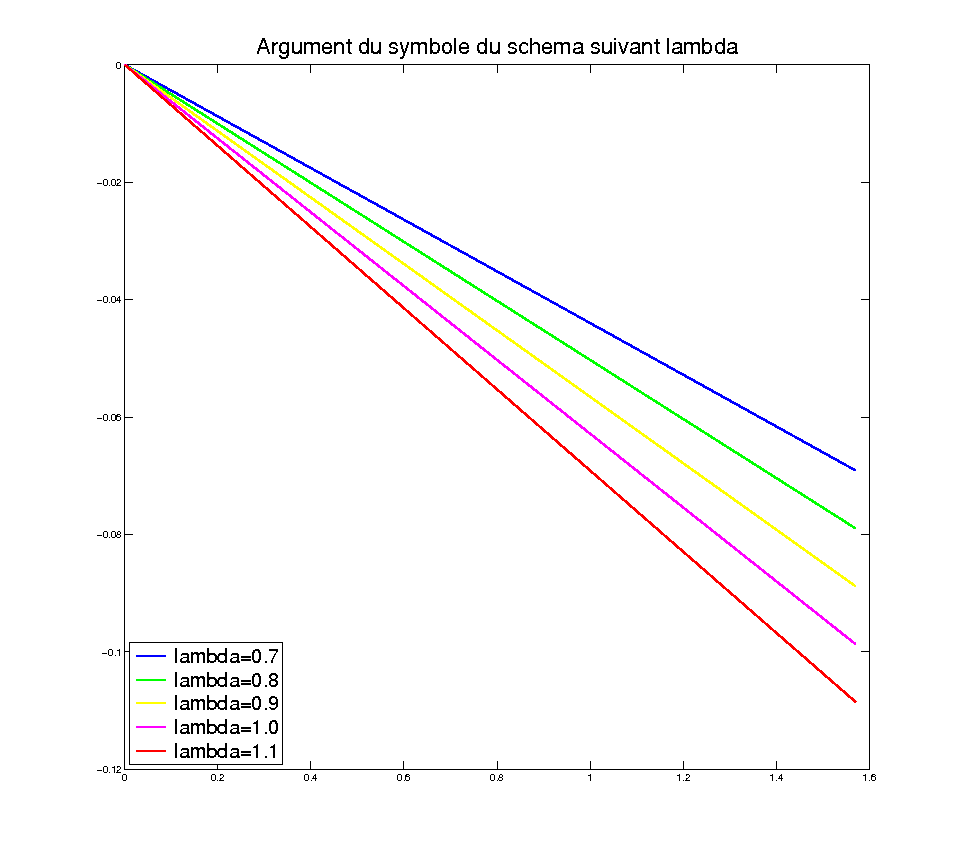

In [29]:
%plot  -s 2000,1800
h=2*pi/100;
W=linspace(0,pi/h,1000);

color = char('b','g','y','m','r');

c2=1;
W2=linspace(0,pi/2,1000);
for lambda=0.7:0.1:1.1
  plot(W2, arg_g4(lambda,W2,h),color(c2), 'LineWidth',2) 
  hold on
  c2=c2+1;
end
title('Argument du symbole du schema suivant lambda','FontSize',22)
legend({' lambda=0.7',' lambda=0.8',' lambda=0.9',' lambda=1.0',' lambda=1.1'},'FontSize',20,'Location','southwest')

In [30]:
A = sparse([],[],[],N,N,0);
B = sparse([],[],[],N,N,0);
for i=1:N
    A(i,i)=1-k/h;
    B(i,i)=1+k/h;
end
for i=1:N-1
    A(i,i+1)=1+k/h;
    B(i,i+1)=1-k/h;
end
A(N,1)=1+k/h;
B(N,1)=1-k/h;

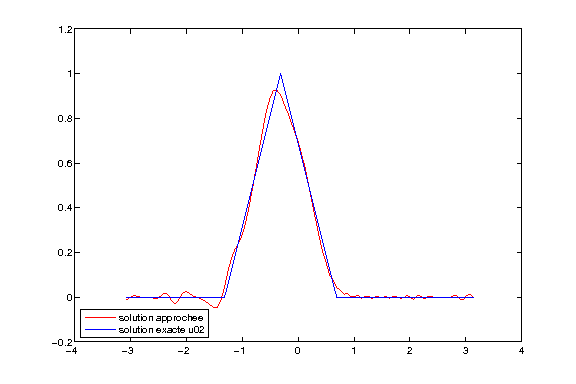

In [43]:
%plot  -s 1200,800
M=U0;
Mex=U0;
U=U0;
for n=1:450
    U=A\(B*U);
    M=[M,U];
    tmp=zeros(N,1);
    for i=1:N
        tmp(i) = u02(x(i+1)-n*k);
    end
    Mex  = [Mex,tmp];
end
plot(x(2:end),M(:,size(M,2)),'r-',x(2:end), Mex(:,size(M,2)),'b-')
legend('solution approchee','solution exacte u02','Location','southwest')

## Conclusion
Nous avons vu plusieurs schémas permettant de trouver une solution approchée à l'équation de transport :
\begin{equation}
\begin{cases}
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
\quad x \in [-\pi,\pi], t\in I\!\!R,\\
u(x,0)=u_0(x)\\
u(.,t) \quad 2\pi\text{-périodique}
\end{cases} \quad \quad(1)
\end{equation}

Pour tous les schémas exceptés Lax-Wendroff, le schéma est stable sous la condition (CFL) $\lambda <1$. Le schéma de Lax-wendroff est inconditionnellement instable. On a vu que quelque soit la valeur de $\lambda$, le symbole du schéma est toujours supérieur à 1.

Les trois premiers schéma n'approximent pas bien la solution exacte de ce problème. En revanche le dernier schéma, le schéma de Thomé est inconditionnellement stable et approxime presque parfaitement la solution exacte.

Sur les trois premiers schémas étudiés, on remarque que la solution approchée est perturbée. Lors de l'étude du symbole du schéma, la phase représente la vitesse à laquelle les modes de Fourier se propagent.

Hormis le schéma de Thomé, les autres schémas étudiés donnent de mauvais résultats avec une solution initiale discontinue.
